In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score

In [2]:

with open(os.getcwd()  + '/star.csv') as file:
    #if not working, replace with with open(os.getcwd()  + '\\krkopt.csv') as file:
    csv_input = csv.reader(file, delimiter=',')
    data_i = []
    for i, row in enumerate(csv_input):
        data_i.append(list(map(float,row)))
    gender_data = np.array(data_i)
    l=len(gender_data[0])
    x_init=gender_data[:,0:l-1]
    y_init=gender_data[:,l-1].astype(int)

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_init, y_init,
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

In [4]:
y_train_hot

matrix([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]])

In [5]:
X_train

array([[8.6600000e+00, 2.3800000e+00, 8.8000000e-01, 7.9000000e-01,
        1.5542885e+01],
       [5.4500000e+00, 3.1900000e+00, 7.7000000e-01, 8.8600000e-01,
        1.2968954e+01],
       [8.5100000e+00, 5.8000000e-01, 1.0600000e+00, 6.1600000e-01,
        1.2327140e+01],
       ...,
       [8.0300000e+00, 4.5200000e+00, 7.0000000e-01, 9.4700000e-01,
        1.6305690e+01],
       [7.3600000e+00, 7.2500000e+00, 6.2000000e-01, 6.0000000e-03,
        1.6661690e+01],
       [7.3400000e+00, 4.3900000e+00, 1.0000000e+00, 1.1310000e+00,
        1.5552322e+01]])

In [8]:

# Initialize neural network object and fit object

fitness_all=[]
algos=['random_hill_climb', 'simulated_annealing','genetic_alg']
learning_rate=[0.1,1,2]
for i in range(3):
    l =learning_rate[i]
    for j in range(3):
        a =algos[j]
        print("====start new====")
        print(" algo:",a," learning rate: ",l)
        start=time.time()
        nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu',algorithm = a, max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = l,
                                 early_stopping = True, clip_max = 5, max_attempts = 100,curve=True,
				 random_state = 3)

        nn_model1.fit(X_train_scaled, y_train_hot)
        end=time.time()
            
        print("time:",end-start,"s")

	
        # Predict labels for train set and assess accuracy
        y_train_pred = nn_model1.predict(X_train_scaled)

        y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

        print('Training accuracy: ', y_train_accuracy)

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model1.predict(X_test_scaled)

        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

        print('Test accuracy: ', y_test_accuracy)
        print('loss:',nn_model1.loss)
        fitness_all.append(nn_model1.fitness_curve)

====start new====
 algo: random_hill_climb  learning rate:  0.1
time: 1.5778870582580566 s
Training accuracy:  0.8530724339169241
Test accuracy:  0.8724279835390947
loss: 0.5342295036307594
====start new====
 algo: simulated_annealing  learning rate:  0.1
time: 2.3784260749816895 s
Training accuracy:  0.8111912118091315
Test accuracy:  0.8257887517146777
loss: 0.5628740199294424
====start new====
 algo: genetic_alg  learning rate:  0.1
time: 62.77829194068909 s
Training accuracy:  0.8626845176793684
Test accuracy:  0.8847736625514403
loss: 0.34547810978084514
====start new====
 algo: random_hill_climb  learning rate:  1
time: 0.4809877872467041 s
Training accuracy:  0.8177136972193615
Test accuracy:  0.8449931412894376
loss: 0.5296878980563586
====start new====
 algo: simulated_annealing  learning rate:  1
time: 1.8631260395050049 s
Training accuracy:  0.8860281496738758
Test accuracy:  0.9053497942386831
loss: 0.33239729198767043
====start new====
 algo: genetic_alg  learning rate:  1

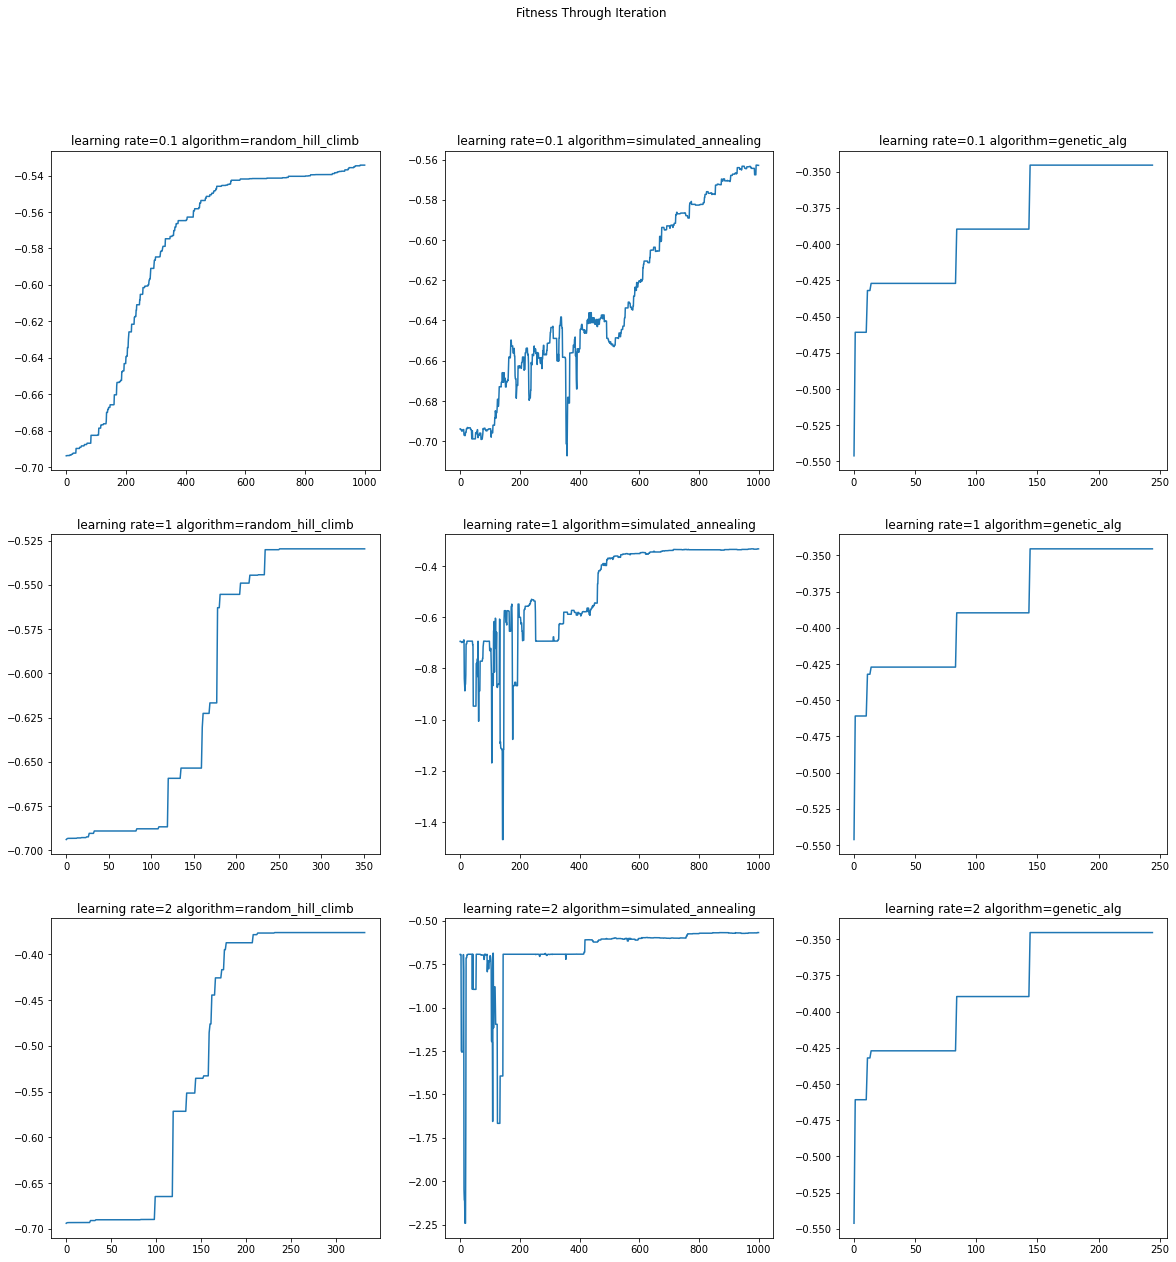

In [9]:
algos=['random_hill_climb', 'simulated_annealing','genetic_alg']
learning_rate=[0.1,1,2]
fig, axs = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Fitness Through Iteration")
for i in range(3):
    for j in range(3):
        f=fitness_all[3*i+j]
        axs[i,j].plot(f)
        t="learning rate="+str(learning_rate[i])+" algorithm="+algos[j]
        axs[i,j].set_title(t)
        
        

In [10]:
fits=[]
fit1=mlrose.OneMax()
fit2=mlrose.FlipFlop()
fit3=mlrose.Queens()
weights = [7, 10, 2, 6, 12]
values = [1, 4, 5, 3, 4]
max_weight_pct = 0.6
fit4 = mlrose.Knapsack(weights, values, max_weight_pct)
fit5=mlrose.FourPeaks(t_pct=0.15)
fits=[fit1,fit2,fit3,fit4,fit5]

In [11]:
best_states=[]
best_fitness=[]
fitness_curves=[]

prob_fit=mlrose.DiscreteOpt(length=50, fitness_fn=fit5, maximize=True, max_val=2)





best_state,best_fitness,fitness_curve=mlrose.random_hill_climb(prob_fit,max_attempts=10, max_iters=1000, restarts=0, init_state=None, curve=True, random_state=None)
print("rhc ","best state:", best_state," best fitness:",best_fitness)
fitness_curves.append(fitness_curve)

s_params=[[1,0.99,0.001],[1,0.1,0.001],[100,0.99,99],[0.01,0.99,0.001]]
for s in s_params:
    sch=mlrose.GeomDecay(init_temp=s[0], decay=s[1], min_temp=s[2])
    best_state,best_fitness,fitness_curve=mlrose.simulated_annealing(prob_fit, schedule=sch, max_attempts=10, max_iters=1000, init_state=None, curve=True, random_state=None)
    print("sa ",s,"best state:", best_state," best fitness:",best_fitness)
    fitness_curves.append(fitness_curve)
    
    
mutations=[0.1,0.5,0.9]
for m in mutations:
    best_state,best_fitness,fitness_curve=mlrose.genetic_alg(prob_fit, pop_size=200, mutation_prob=m, max_attempts=10, max_iters=1000, curve=True, random_state=None)
    print("ga ","m","best state:", best_state," best fitness:",best_fitness)
    fitness_curves.append(fitness_curve)    
    
best_state,best_fitness,fitness_curve=mlrose.mimic(prob_fit, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=1000, curve=True, random_state=None, fast_mimic=True)
print("MIMIC ","best state:", best_state," best fitness:",best_fitness)
fitness_curves.append(fitness_curve) 

rhc  best state: [0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 0 0 1 1 1 0 0 0 0]  best fitness: 4.0
sa  [1, 0.99, 0.001] best state: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0]  best fitness: 81.0
sa  [1, 0.1, 0.001] best state: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 0 1 1 1 0 0 1 1 0 0 1 0]  best fitness: 33.0
sa  [100, 0.99, 99] best state: [1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 0 1 1 1 1]  best fitness: 2.0
sa  [0.01, 0.99, 0.001] best state: [1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]  best fitness: 24.0


/Users/yuqima/opt/anaconda3/lib/python3.8/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


ga  m best state: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 0]  best fitness: 64.0
ga  m best state: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 0 0 1 0 1 0]  best fitness: 17.0
ga  m best state: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 1 0 1]  best fitness: 14.0
MIMIC  best state: [1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]  best fitness: 22.0


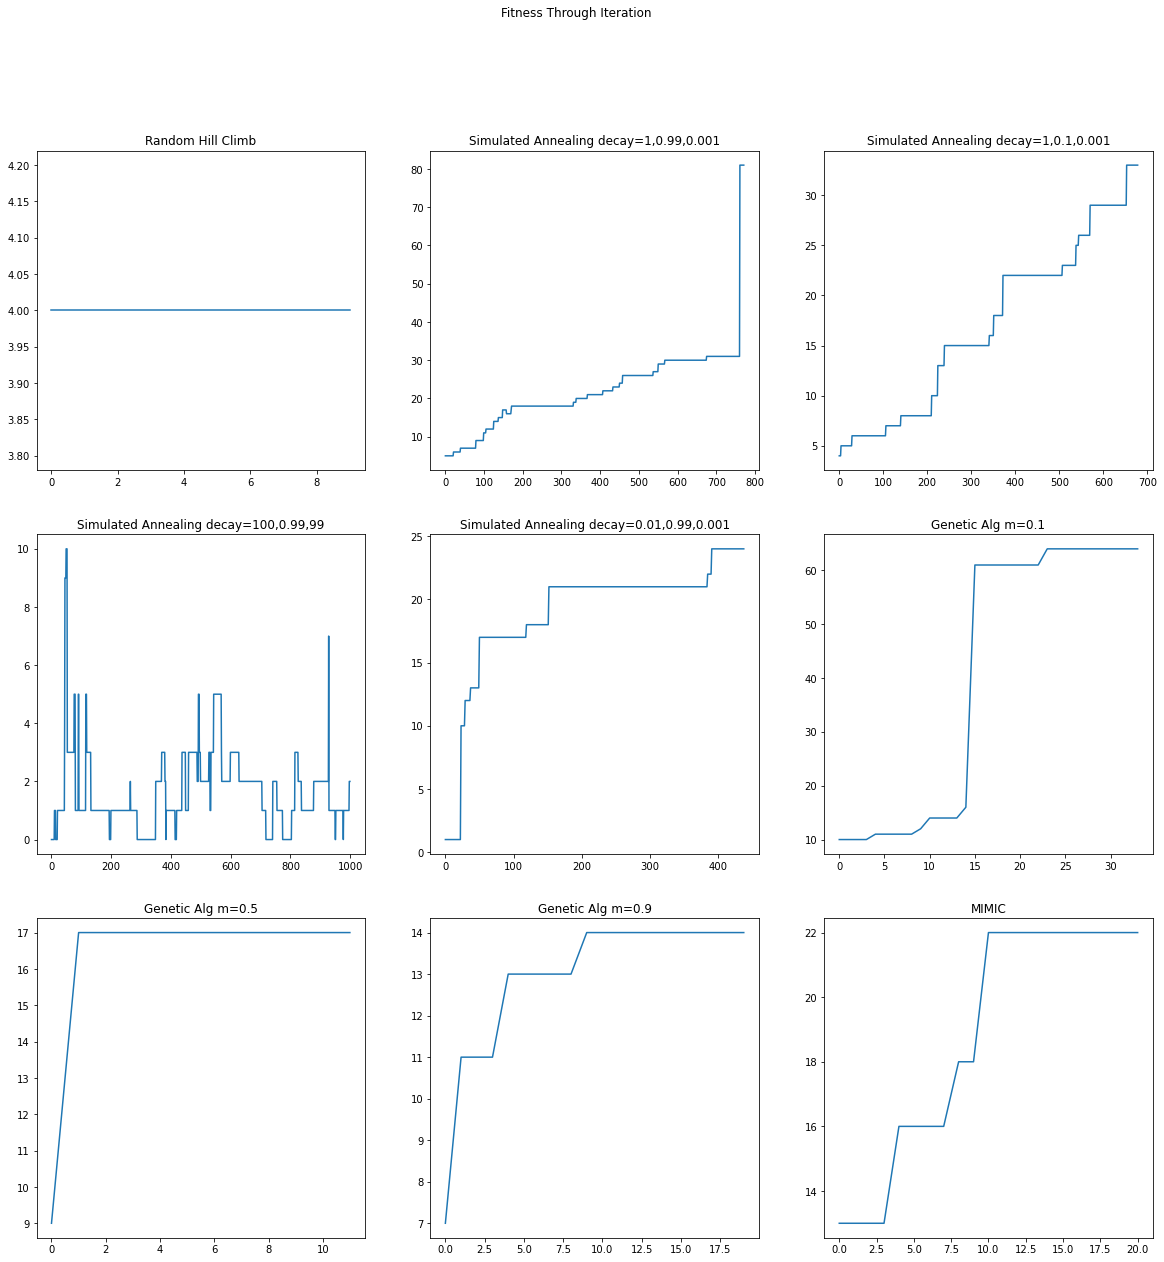

In [12]:
algos=['Random Hill Climb', 
       'Simulated Annealing decay=1,0.99,0.001',
       'Simulated Annealing decay=1,0.1,0.001',
       'Simulated Annealing decay=100,0.99,99',
       'Simulated Annealing decay=0.01,0.99,0.001',
       'Genetic Alg m=0.1',
      'Genetic Alg m=0.5',
      'Genetic Alg m=0.9',
      'MIMIC']
fig, axs = plt.subplots(3,3,figsize=(20,20))
fig.suptitle("Fitness Through Iteration")
for i in range(3):
    for j in range(3):
        f=fitness_curves[3*i+j]
        axs[i,j].plot(f)
        axs[i,j].set_title(algos[3*i+j])
        